In [ ]:
import numpy as np
import tensorflow_datasets as tfds 
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
imdb,info = tfds.load('imdb_reviews',with_info = True,as_supervised=True)
train_data,test_data = imdb['train'],imdb['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteDOYL1V/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteDOYL1V/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteDOYL1V/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []

In [ ]:
for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf-8'))
  training_labels.append(l.numpy())
for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf-8'))
  testing_labels.append(l.numpy())

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

In [ ]:
tokenizer = Tokenizer(num_words =vocab_size ,oov_token = '<OOV>')
tokenizer.fit_on_texts(training_sentences)
seq_t = tokenizer.texts_to_sequences(training_sentences)
pad_seq = pad_sequences(seq_t,truncating=trunc_type,maxlen = max_length)

In [ ]:
seq_tt = tokenizer.texts_to_sequences(testing_sentences)
pad_seq_t = pad_sequences(seq_tt,maxlen=max_length,truncating= trunc_type)

In [ ]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length= max_length),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                             tf.keras.layers.Dense(units = 6,activation = 'relu'),
                             tf.keras.layers.Dense(units =1,activation ='sigmoid' )
])
model.compile(loss= 'binary_crossentropy',metrics = ['accuracy'],optimizer= 'adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                12544     
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epoch_num = 10
history = model.fit(pad_seq,training_labels_final,epochs= epoch_num,validation_data=(pad_seq_t,testing_labels_final))


Epoch 1/10
782/782 [==============================] - 63s 80ms/step - loss: 0.6670 - accuracy: 0.5923 - val_loss: 0.6746 - val_accuracy: 0.5990
Epoch 2/10
782/782 [==============================] - 63s 80ms/step - loss: 0.6496 - accuracy: 0.6381 - val_loss: 0.6564 - val_accuracy: 0.6226
Epoch 3/10
782/782 [==============================] - 63s 80ms/step - loss: 0.6135 - accuracy: 0.6899 - val_loss: 0.5374 - val_accuracy: 0.7608
Epoch 4/10
782/782 [==============================] - 62s 79ms/step - loss: 0.4526 - accuracy: 0.8168 - val_loss: 0.4770 - val_accuracy: 0.7908
Epoch 5/10
782/782 [==============================] - 62s 80ms/step - loss: 0.3541 - accuracy: 0.8690 - val_loss: 0.4362 - val_accuracy: 0.8144
Epoch 6/10
782/782 [==============================] - 62s 80ms/step - loss: 0.2923 - accuracy: 0.8960 - val_loss: 0.4517 - val_accuracy: 0.8092
Epoch 7/10
782/782 [==============================] - 62s 80ms/step - loss: 0.2507 - accuracy: 0.9128 - val_loss: 0.4779 - val_accuracy:

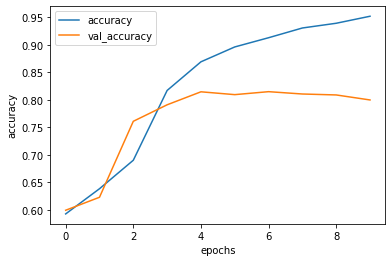

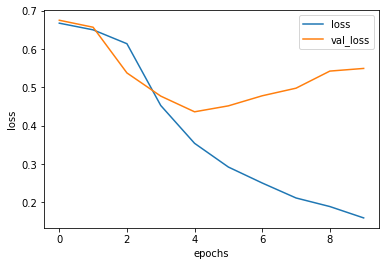

In [ ]:
import matplotlib.pyplot as plt 
def plot_graphss(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history["val_"+string])
  plt.xlabel('epochs')
  plt.ylabel(string)
  plt.legend([string,"val_"+string])
  plt.show()
plot_graphss(history,'accuracy')
plot_graphss(history,'loss')


In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length= max_length),
                             tf.keras.layers.Conv1D(128,5,activation='relu'),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(6,activation = 'relu'),
                             tf.keras.layers.Dense(1,activation= 'sigmoid')
                             ])

In [ ]:
model.compile(loss= 'binary_crossentropy',metrics= ['accuracy'],optimizer= 'adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epoch_num = 10
model.fit(pad_seq,training_labels_final,epochs= epoch_num,validation_data= (pad_seq_t,testing_labels_final) )

Epoch 1/10
782/782 [==============================] - 12s 15ms/step - loss: 0.4484 - accuracy: 0.7738 - val_loss: 0.3766 - val_accuracy: 0.8348
Epoch 2/10
782/782 [==============================] - 12s 16ms/step - loss: 0.2771 - accuracy: 0.8872 - val_loss: 0.4014 - val_accuracy: 0.8251
Epoch 3/10
782/782 [==============================] - 12s 15ms/step - loss: 0.2260 - accuracy: 0.9133 - val_loss: 0.4232 - val_accuracy: 0.8227
Epoch 4/10
782/782 [==============================] - 12s 16ms/step - loss: 0.1881 - accuracy: 0.9292 - val_loss: 0.4653 - val_accuracy: 0.8170
Epoch 5/10
782/782 [==============================] - 12s 15ms/step - loss: 0.1561 - accuracy: 0.9444 - val_loss: 0.5151 - val_accuracy: 0.8115
Epoch 6/10
782/782 [==============================] - 12s 15ms/step - loss: 0.1294 - accuracy: 0.9561 - val_loss: 0.5662 - val_accuracy: 0.8064
Epoch 7/10
782/782 [==============================] - 12s 15ms/step - loss: 0.1024 - accuracy: 0.9678 - val_loss: 0.6993 - val_accuracy:

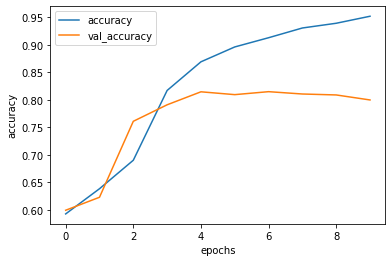

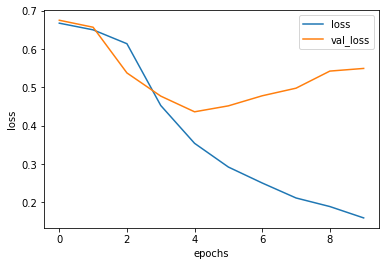

In [ ]:
import matplotlib.pyplot as plt 
def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history["val_"+string])
  plt.xlabel('epochs')
  plt.ylabel(string)
  plt.legend([string,"val_"+string])
  plt.show()
plot_graphs(history,'accuracy')
plot_graphs(history,'loss')
